<a href="https://colab.research.google.com/github/LeyiYe/IMLO-assessment/blob/main/network_diagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import Flowers102
from torch.utils.data import DataLoader
import numpy as np
import torch.optim as optim
import torch.nn.functional as F
import torch.nn as nn

%pip install -U git+https://github.com/szagoruyko/pytorchviz.git@master
from torchviz import make_dot, make_dot_from_trace

class CNN_NN(nn.Module):
    def __init__(self, num_classes=102):
        super(CNN_NN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv5= nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.conv6= nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation =1, ceil_mode=False)

        # Initialize the size of the fully connected layer based on the sample input
        self._to_linear = None
        self.convs = nn.Sequential(
            self.conv1,
            nn.ReLU(inplace=True),
            self.conv2,
            nn.ReLU(inplace=True),
            self.pool,
            self.conv3,
            nn.ReLU(inplace=True),
            self.conv4,
            nn.ReLU(inplace=True),
            self.pool,
            self.conv5,
            nn.ReLU(inplace=True),
            self.conv6,
            nn.ReLU(inplace=True),
            self.pool,
        )
        self._initialize_linear_layer()

        self.fc1 = nn.Linear(self._to_linear, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.dropout = nn.Dropout(0.5)

    def _initialize_linear_layer(self):
        # Create a dummy input tensor to calculate the output size after conv layers
        x = torch.randn(1, 3, 224, 224)
        x = self.convs(x)
        self._to_linear = x.view(1, -1).shape[1]

    def forward(self, x):
        x = self.convs(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor while preserving the batch size
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
make_dot(y.mean(), params=dict(model.named_parameters()))

  Cloning https://github.com/szagoruyko/pytorchviz.git (to revision master) to /tmp/pip-req-build-w3rtqq5g
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz.git /tmp/pip-req-build-w3rtqq5g
  Resolved https://github.com/szagoruyko/pytorchviz.git to commit 0adcd83af8aa7ab36d6afd139cabbd9df598edb7
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cach

NameError: name 'y' is not defined

In [ ]:
pip install matplotlib


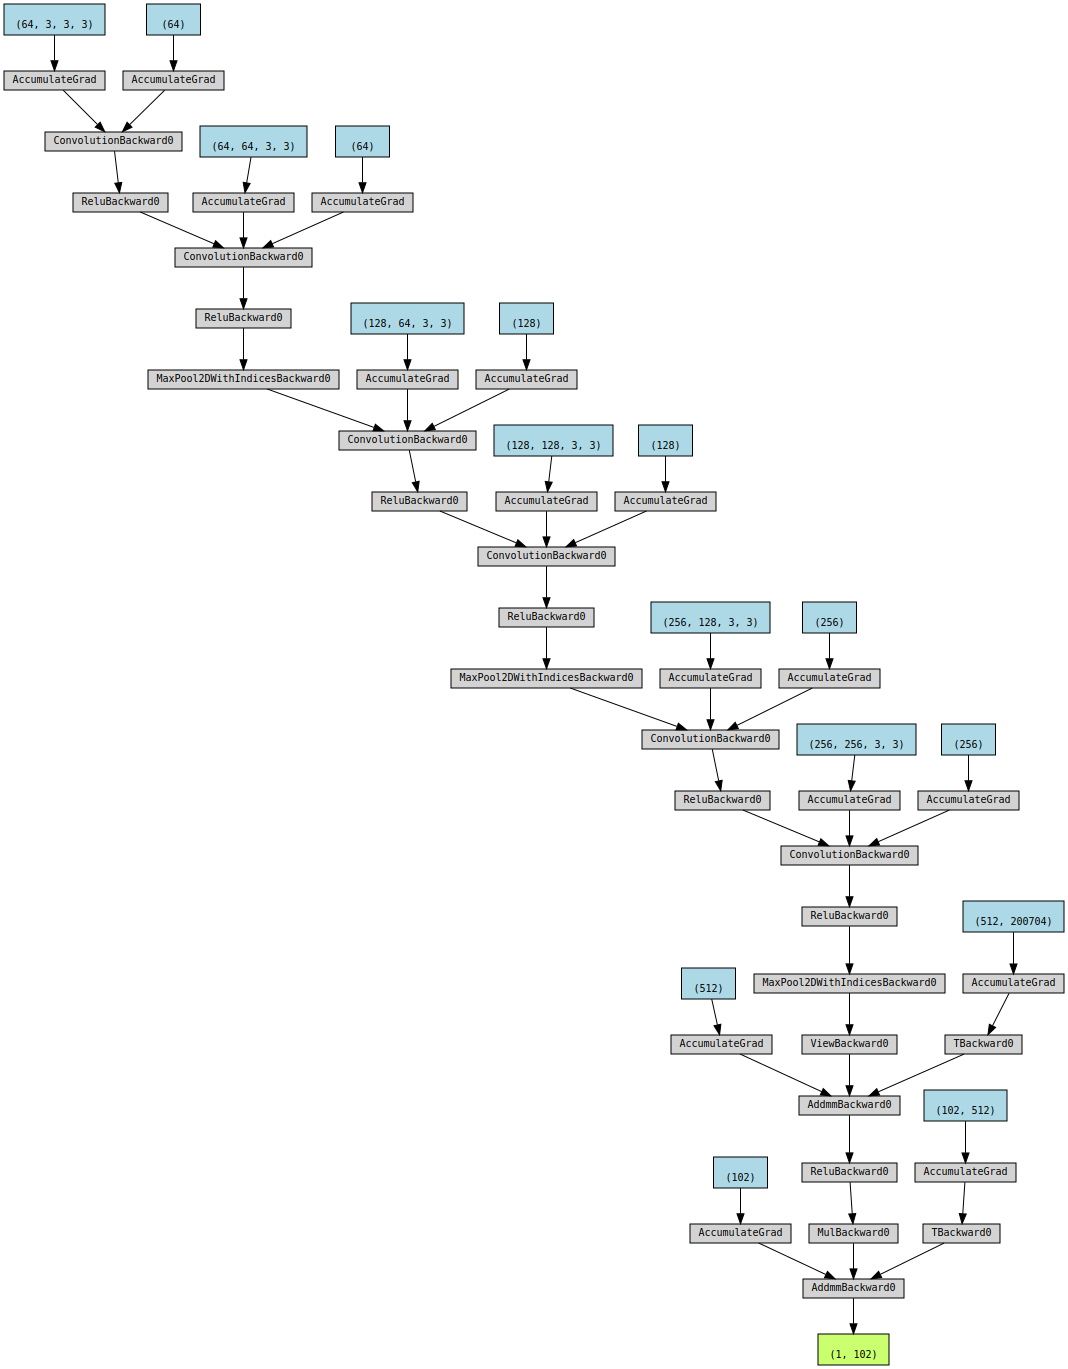

In [48]:
import os
import torch
import torchvision.transforms as transforms
from torchvision.datasets import Flowers102
from torch.utils.data import DataLoader
import numpy as np
import torch.optim as optim
import torch.nn.functional as F
import torch.nn as nn
from torchviz import make_dot
"""import os
from PIL import Image"""

# Define transforms for data augmentation and normalization
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.RandomResizedCrop(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset with train/val/test splits
train_dataset = Flowers102(root='./data', split='train', transform=train_transform, download=True)
val_dataset = Flowers102(root='./data', split='val', transform=val_transform, download=True)
test_dataset = Flowers102(root='./data', split='test', transform=val_transform, download=True)

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

class CNN_NN(nn.Module):
    def __init__(self, num_classes=102):
        super(CNN_NN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

        # Initialize the size of the fully connected layer based on the sample input
        self._to_linear = None
        self.convs = nn.Sequential(
            self.conv1,
            nn.ReLU(inplace=True),
            self.conv2,
            nn.ReLU(inplace=True),
            self.pool,
            self.conv3,
            nn.ReLU(inplace=True),
            self.conv4,
            nn.ReLU(inplace=True),
            self.pool,
            self.conv5,
            nn.ReLU(inplace=True),
            self.conv6,
            nn.ReLU(inplace=True),
            self.pool,
        )
        self._initialize_linear_layer()

        self.fc1 = nn.Linear(self._to_linear, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.dropout = nn.Dropout(0.5)

    def _initialize_linear_layer(self):
        # Create a dummy input tensor to calculate the output size after conv layers
        x = torch.randn(1, 3, 224, 224)
        x = self.convs(x)
        self._to_linear = x.view(1, -1).shape[1]

    def forward(self, x):
        x = self.convs(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor while preserving the batch size
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define the device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the model
model = CNN_NN(num_classes=102).to(device)

# Generate the diagram using torchviz
dummy_input = torch.randn(1, 3, 224, 224).to(device)
dot=make_dot(model(dummy_input), show_attrs=False, show_saved=False)
dot.attr(size="30,30")
dot
